# Exercises: Means 
By Christopher van Hoecke and Max Margenot

## Lecture Link :
https://www.quantopian.com/lectures/means

### IMPORTANT NOTE: 
This lecture corresponds to the Means lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [1]:
# Useful Functions
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.iteritems():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

In [2]:
# Useful Libraries
import scipy.stats as stats
import numpy as np

#### Data:

In [3]:
l=[]
for x in range(1,100):
    x=np.random.randint(1,100)
    l.append(x)

----

# Exercise 1 : Arithmetic mean.
## a. Mean of random data set.
Find the mean of the randomly generated data set `l`. 

In [4]:
## Your code goes here
print "Arithmetic mean of randomly generated data set: ", np.mean(l)

Arithmetic mean of randomly generated data set:  44.9494949495


## b. Mean of returns
Find the mean of the returns of Iteris Inc. (ITI).

In [5]:
price = get_pricing('ITI', fields='price', start_date='2005-01-01', end_date='2010-01-01')
returns = price.pct_change()[1:]

## Your code goes here.
print "Arithmetic mean of the ITI returns: ", np.mean(returns)

Arithmetic mean of the ITI returns:  -8.33695292019e-05


---

# Exercise 2 : Median
## a. Median of random data set
Find the median of the randomly generated data set `l`.

In [6]:
## Your code goes here   
print "Median of randomly generated data set: ", np.median(l)

Median of randomly generated data set:  42.0


## b. Median of the returns.
Find the median associated with the returns of Bank of America Corp. (BAC).

In [7]:
price = get_pricing('BAC', fields='open_price', start_date='2005-01-01', end_date='2010-01-01')
returns = price.pct_change()[1:]

## Your code goes here
print "Median of BAC returns: ", np.median(returns)

Median of BAC returns:  -0.000409084894317


----

# Exercise 3 : Mode
## a. Mode of a random data set. 
Find the mode of the random generated data set `l`.

In [8]:
## Your code goes here
print "Mode of randomly generated data set: ", mode(l)

Mode of randomly generated data set:  [29]


`mode` function used above is written by authors of the notebook. Let's develop our own approach from scratch.

In [9]:
#let's develop our approach
def mode_our(a):
    counts = {}
    for e in a:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
    
    #find most freq
    max_enc = max(counts.values())
    idx = []
    for i in range(len(counts.values())):
        if max_enc == counts.values()[i]:
            idx.append(i)
    
    #now most freq elements save in mode list
    if len(idx) == len(a):
        return "No mode"
    
    mode = []
    for i in idx:
        mode.append(counts.keys()[i])
    return mode

In [10]:
print "Mode calculated by using our approach: ", mode_our(l)

Mode calculated by using our approach:  [29]


In [11]:
#check that mode calculated by both approaches is coincides
assert mode_our(l) == mode(l)

## b. Mode of the returns. 
Find the mode associated with the returns of Goldman Sachs Corp. (GS). *Recall with returns, there may not be any values that appear more than once.*

In [12]:
start = '2014-01-01'
end = '2015-01-01'
pricing = get_pricing('GS', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

## Your code goes here
print "Mode calculated by function introduced by authors: ", mode(returns)
print "Mode calculated by function created by us:         ", mode_our(returns.values)

Mode calculated by function introduced by authors:  No mode
Mode calculated by function created by us:          No mode


----

# Exercise 4 : Geometric mean
## a. Geometric Mean of random data set.
Find the Geometric mean of the random generated data set.

In [13]:
## Your code goes here
x = np.random.randint(1,100, 50)
print "Elements of a list:"
print x, "\n"
print "Geometric mean: ", stats.gmean(x)

Elements of a list:
[65 15 28 55 54  3 22 61 40 73 70 34 71 37 73 54 94 86 21 35 16 43 21  2 68
 38 44 84 69 35  6 28 19 27 34 83  3 34 64 18 89 86 34 67 48 75  4 24 43 41] 

Geometric mean:  33.8079266586


In [14]:
print "Geometric mean of earlier generated data: ", stats.gmean(l)

Geometric mean of earlier generated data:  34.4354355059


## b. Geometric Mean of returns. 
Find the Geometric Mean of the price of Citi bank (C) for the last 5 years. 

In [15]:
price = get_pricing('C', fields='open_price', start_date='2005-01-01', end_date='2010-01-01')

## Your code goes here
print "Geometric Mean of the price: ", stats.gmean(price)

Geometric Mean of the price:  21.5434707851


---

# Exercise 5 : Harmonic mean.
## a. Harmonic Mean of random data set. 
Find the harmonic mean of the randomly generated data set `l`.

In [16]:
## Your code goes here 
print "Harmonic mean of randomly generated data: ", stats.hmean(l)

Harmonic mean of randomly generated data:  16.7694380392


## b. Harmonic Mean of stock returns.
Find the Harmonic Mean of the financial ETF (XLF) over the last 2 years.

In [17]:
## Your code goes here
start = '2017-12-04'
end = '2019-12-04'
price = get_pricing('XLF', fields = 'open_price', start_date = start, end_date = end)
returns = price.pct_change()[1:]
print stats.hmean(returns)

ValueError: Harmonic mean only defined if all elements greater than zero

Since returns were negative sometimes during that time-interval we cannot compute harmonic mena of stock returns. However, we can compute harmonic mean of stock prices.

In [18]:
print "Harmonic mean of prices: ", stats.hmean(price.values)

Harmonic mean of prices:  26.8689066929


----

# Exercise 6 : Skewness and why it matters.
Skewness in a probability distribution is the measure of asymmetry. Negative skew has fewer low values and a longer left tail, whereas positive skew has fewer high values and a longer right tail.
In asset pricing, skewness is an important information, naimly in risk assessment. Knowledge that the market has a 60% chance of going down and a 40% chance of going up apears helpfull but only if we know the market is obeying a normal distrubtuion. If we are told that the market will go up 2% but down 18%, we can see how skewness would give us better information.

Determine if the returns of SPY from 2010 to 2017 is positivly or negativly skewed. 
*Recall a data set is positivly skewed if the mode is smaller than the median, which is smaller than the mean. A data set is negativly skewed in the event of the reverse (i.e: the mean is greater than the median, which is greater than the mode)*

In [19]:
price = get_pricing('SPY', fields='volume', start_date='2010-01-01', end_date='2017-01-01')
returns = price.pct_change()[1:]

## Your code goes here
print "Skewness of Returns", stats.skew(returns)
print "There is one more way to check this \n"

#calculate mode (two approaches author's and our), median and mean
mode_authors = [stats.mode(returns)[0][0] if mode(returns) == 'No mode' else mode(returns)][0]
mode_our = [stats.mode(returns)[0][0] if mode(returns) == 'No mode' else mode_our(returns)][0]
median = np.median(returns)
mean = np.mean(returns)

print "Mode authors: ", mode_authors
print "Mode our:     ", mode_our
#check that both values coincide
assert mode_authors == mode_our
print "Median:       ", median
print "Mean:          ", mean, '\n'

if (mode_our < median) and (median < mean):
    print "Returns are positively skewed"
if (mean < median) and (median < mode_our):
    print "Returns are negatively skewed"
if (mean == median) and (median == mode_our):
    print "Returns are not skewed"

Skewness of Returns 1.5411170774
There is one more way to check this 

Mode authors:  -0.781493141886
Mode our:      -0.781493141886
Median:        -0.0156134608453
Mean:           0.0532647454828 

Returns are positively skewed


We can clearly see positive skewing from the histogram of the returns. We see fewer higher values and a longer right tail.
Plot the histograms of the returns now.

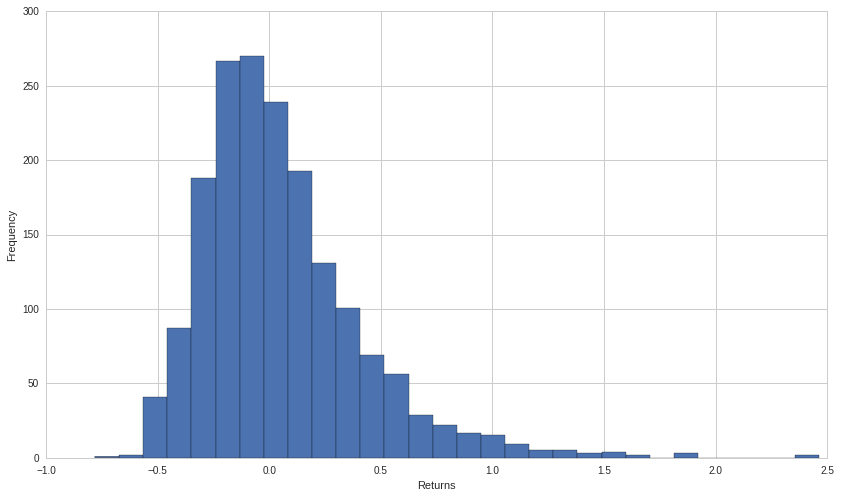

In [20]:
## Your code here
from matplotlib import pyplot as plt
plt.hist(returns.values, 30)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

---

Congratulations on completing the Means exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*